## Feature extraction 

In [1]:
from jl_song_data import SongData 

In [2]:
data = SongData('../data/chords_clean_1_2_3_4_5_6.csv')

In [3]:
df = data.df

In [4]:
from jl_feature_extractor import FeatureExtractor    

feature_extractor = FeatureExtractor()

##  Extract artist 

In [5]:
df['artist'] = df['url'].apply(feature_extractor.extract_pretty_artist)

In [6]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist
8062,https://tabs.ultimate-guitar.com/tab/madonna/d...,Dont Tell Me (ver 2),2000s,Electronic%%Electronic,"['D', 'Am', 'C', 'G', 'D', 'Am', 'C', 'G', 'D'...",6f59cba0-30aa-4071-a512-c0ee66f082ea,Madonna
10308,https://tabs.ultimate-guitar.com/tab/red/piece...,Pieces (ver 2),2000s,Metal,"['E', 'F#', 'G#m', 'G#m', 'E', 'E', 'F#', 'G#m...",7a2351e9-6340-4032-be2e-fdfc98e85f16,Red
13479,https://tabs.ultimate-guitar.com/tab/usher/mov...,Moving Mountains (ver 2),2000s,Contemporary R&b,"['Em', 'C', 'G', 'D', 'Em', 'C', 'G', 'D', 'Em...",7af36ad0-f206-430a-8535-970c9743bc33,Usher
2483,https://tabs.ultimate-guitar.com/tab/christy-m...,Ordinary Man (ver 2),1980s,Folk,"['F', 'G', 'Am', 'C', 'E', 'F', 'G', 'Am', 'Am...",6711ad43-1fb8-452b-94bc-a1338b133ab2,Christy Moore
10322,https://tabs.ultimate-guitar.com/tab/reel-big-...,Dont Stop Skankin,2010s,Reggae,"['Dm', 'Am', 'A#', 'A', 'Dm', 'Am', 'G', 'A#',...",c4a52d97-400e-4c12-830f-9dec74709ba6,Reel Big Fish
4594,https://tabs.ultimate-guitar.com/tab/frank-sin...,Autumn Leaves (ver 2),1950s,Pop%%Jazz,"['Dm7', 'Bb/D', 'C', 'Fmaj7', 'Bm7b5', 'E7', '...",cd798f72-4f36-4bb7-93cb-567039a0b546,Frank Sinatra
5578,https://tabs.ultimate-guitar.com/tab/howlin-wo...,Spoonful,1960s,Blues,"['Em', 'G', 'Em', 'G7', 'Em', 'G7', 'Em', 'G7'...",0e723088-08ba-4ebc-b26d-b0911eb23438,Howlin Wolf
9102,https://tabs.ultimate-guitar.com/tab/neutral-m...,A Baby For Pree,1990s,Folk,"['C', 'F', 'C', 'F', 'C', 'F', 'C', 'F', 'E', ...",c4a081ae-1079-45d4-8e19-b98ed2b1a2d9,Neutral Milk Hotel
12889,https://tabs.ultimate-guitar.com/tab/tim_mcgra...,Humble And Kind (ver 2),2010s,Country,"['G', 'Em', 'C', 'G', 'Em', 'C', 'G', 'G', 'Em...",c6c11352-9aa8-4ef2-a0d5-4ad76052d0c9,Tim Mcgraw
5669,https://tabs.ultimate-guitar.com/tab/inner-cir...,Black Roses,1990s,Reggae,"['Bb', 'G', 'Bbmaj7', 'Gm', 'Bb', 'G', 'Bbmaj7...",1f86c8d2-e232-41ef-b768-e3772db69c21,Inner Circle


## Extract decade as numeric 

In [7]:
df['decade'].unique()

array(['1980s', '2000s', '2010s', '1990s', '1960s', '1970s', '1950s'],
      dtype=object)

In [8]:
df['decade'] = df['decade'].apply(feature_extractor.extract_numeric_decade)

In [9]:
df['decade'].unique()

array([1980, 2000, 2010, 1990, 1960, 1970, 1950])

## Harmonics features 

This eval is to convert string column to array colum

In [10]:
df['chords'] = df['chords'].apply(eval)

### Cardinality (number of chords) 

In [11]:
df['cardinality'] = df['chords'].apply(feature_extractor.extract_cardinality)

In [12]:
df.sample(10)

,url,name,decade,genre,chords,uuid,artist,cardinality
519,https://tabs.ultimate-guitar.com/tab/albert_ki...,Born Under A Bad Sign (ver 2),1960,Blues%%Blues,"[C#, G#, F#, E, C#, C#, C#, G#, F#, E, C#, C#,...",a50c9371-7d34-430c-bf85-bb7e24d8e45d,Albert King,30
1124,https://tabs.ultimate-guitar.com/tab/beastie_b...,Tough Guy,1990,Hip Hop,"[F, G#, Bb, F, G#, Bb, F, G#, Bb, A, F, G#, Bb...",bc42fa03-c0a2-48fc-83cc-23ae30cf8db1,Beastie Boys,60
4252,https://tabs.ultimate-guitar.com/tab/everythin...,Missing,1990,Pop,"[Am, Am, Em7, Am, G, Am, Em7, Am, G, Am, F, G,...",8ac9370e-f16f-4b92-985b-52ce6fecaf87,Everything But The Girl,73
10260,https://tabs.ultimate-guitar.com/tab/ray-charl...,You Dont Know Me (ver 8),1960,Jazz,"[C, C, CM7, C6, C7, F, FM7, Dm, D#dim, C, A7, ...",0555a301-8b2d-4a12-a924-72910b01f826,Ray Charles,62
12905,https://tabs.ultimate-guitar.com/tab/timbaland...,If We Ever Meet Again,2000,Contemporary R&b,"[G, B7, Em, C, G, B7, Em, C, G, B7, Em, C, G, ...",963e7aef-d614-49a9-93e9-2b4d2fda0b93,Timbaland,36
3579,https://tabs.ultimate-guitar.com/tab/ed-sheera...,The Parting Glass,2010,Folk,"[F#m, D, A, E, F#m, D, A, E, F#m, D, A, E, F#m...",d5b3f50b-56bb-4fc8-804d-a5ed30394463,Ed Sheeran,107
9008,https://tabs.ultimate-guitar.com/tab/neil-diam...,Sweet Caroline (ver 5),1970,Pop%%Folk,"[G, C, G, D, G, C, G, D, G, Em, D, C, D, D, C,...",6a3bbdd4-9fb9-4a47-acdd-e362569909e1,Neil Diamond,103
2168,https://tabs.ultimate-guitar.com/tab/carrie-un...,Before He Cheats,2000,Country,"[F#m, E, D, E, F#m, E, D, C#, F#m, E, D, C#7, ...",8bbf7ffb-877f-4642-9315-40b1a8a5b528,Carrie Underwood,106
3084,https://tabs.ultimate-guitar.com/tab/depeche-m...,Sometimes,1980,Electronic,"[G, D, G, D, C, G, Em, D, G, D, G, D, C, G, Em...",f1350a8e-93ef-4fe9-8280-e48b3c038001,Depeche Mode,24
664,https://tabs.ultimate-guitar.com/tab/alligatoa...,Fick Ihn Doch (ver 2),2010,Hip Hop,"[F, E, Am, F, E, Am, F, E, Am, F, E, Am, F, E,...",43e46f01-e8a0-48a9-8ef7-e9100fa729f2,Alligatoah,99


In [13]:
df['cardinality'].describe()

count    14114.000000
mean        85.595012
std         68.730613
min          0.000000
25%         51.000000
50%         77.000000
75%        108.000000
max       2020.000000
Name: cardinality, dtype: float64

In [14]:
df[df['cardinality'] == 0]

,url,name,decade,genre,chords,uuid,artist,cardinality
19,https://tabs.ultimate-guitar.com/tab/120815,Balladen Om Herr Fredrik Åkare Och Den Söta Fr...,1960,Jazz,[],752b3d65-297f-4777-acc4-e9d92e243a72,Unknown,0
160,https://tabs.ultimate-guitar.com/tab/883/cumul...,Cumuli,1990,Electronic,[],523bfc79-9f5d-4747-8db3-366bd5d32152,883,0
163,https://tabs.ultimate-guitar.com/tab/883/rotta...,Rotta X Casa Di Dio,1990,Electronic%%Electronic,[],8c8a69f6-7027-4816-a91d-d219d87582ca,883,0
217,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 3),1970,Pop,[],044a35a5-3943-49a5-bb6a-e0f5e19776cf,Abba,0
218,https://tabs.ultimate-guitar.com/tab/abba/danc...,Dancing Queen (ver 4),1970,Pop%%Pop%%Pop,[],bb8e839f-0d3f-40b6-9ee3-5fd4aa0301e1,Abba,0
...,...,...,...,...,...,...,...,...
12490,https://tabs.ultimate-guitar.com/tab/the_lonel...,Like A Boss,2000,Hip Hop,[],1a6d53ae-aeea-4bdd-a1e2-3100bbf3c88e,The Lonely Island,0
13107,https://tabs.ultimate-guitar.com/tab/tony_benn...,A Child Is Born,1970,Jazz,[],1dc741fc-51a9-40ef-a328-48eb8a467b62,Tony Bennett,0
13369,https://tabs.ultimate-guitar.com/tab/tyler_the...,Answer,2010,Hip Hop,[],8474fdc1-00c5-457a-9178-41b1bb48a21f,Tyler The Creator,0
13802,https://tabs.ultimate-guitar.com/tab/wham/free...,Freedom,1980,Rhythm And Blues%%Rhythm And Blues%%Rhythm And...,[],f0a72548-c85e-4848-bf60-af2e62993f5d,Wham,0


Some songs are been uploaded by user/ultimate guitar without including the special format for the chords, for example, in https://tabs.ultimate-guitar.com/tab/883/rotta-x-casa-di-dio-chords-89055. Let's remove them

In [15]:
df = df[df['cardinality'] != 0]

In [16]:
df['cardinality'].describe()

count    14043.000000
mean        86.027772
std         68.633450
min          1.000000
25%         51.000000
50%         78.000000
75%        109.000000
max       2020.000000
Name: cardinality, dtype: float64

The same occurs for songs with one or two chords (eg. https://tabs.ultimate-guitar.com/tab/mad-caddies/souls-for-sale-chords-837415)

In [17]:
df = df[df['cardinality'] != 1]

In [18]:
df = df[df['cardinality'] != 2]

In [19]:
df['cardinality'].describe()

count    14031.000000
mean        86.099993
std         68.618328
min          3.000000
25%         52.000000
50%         78.000000
75%        109.000000
max       2020.000000
Name: cardinality, dtype: float64

In [20]:
df['cardinality'].mode()

0    68
dtype: int64

Total number of chords

In [21]:
df['cardinality'].sum()

1208069

In [22]:
import matplotlib.pyplot as plt

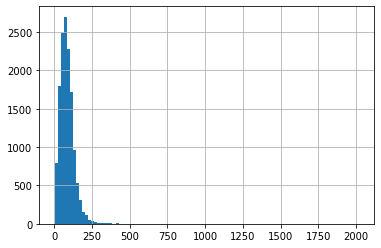

In [23]:
df['cardinality'].hist(bins=100)

### Unique cardinality (number of different chords) 

In [30]:
df['unique cardinality'] = df['chords'].apply(feature_extractor.extract_unique_cardinality)

In [31]:
df['unique cardinality'].describe()

count    14031.000000
mean         7.651343
std          5.449871
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        101.000000
Name: unique cardinality, dtype: float64

Mode is 4...modern music is not very rich...

In [32]:
df['unique cardinality'].mode()

0    4
dtype: int64

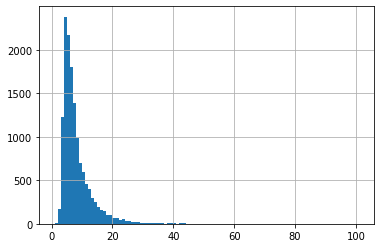

In [33]:
df['unique cardinality'].hist(bins=100)

In [38]:
pop = df[df['genre'].str.contains('Pop')]

In [39]:
jazz = df[df['genre'].str.contains('Jazz')]

In [45]:
pop['unique cardinality'].mode()

0    5
dtype: int64

In [46]:
jazz['unique cardinality'].mode()

0    6
dtype: int64

## Genre (to be improved) 

In [26]:
def remove_duplicate_genre_inside_cell(value):
    unique_genres = list(set(value.split('%%')))
    unique_genres.sort(key=str.lower)
    return '%%'.join(unique_genres)
    

df['genre'].apply(remove_duplicate_genre_inside_cell).unique()

array(['Folk', 'Folk%%Pop', 'Electronic', 'Classical%%Pop',
       'Electronic%%Pop', 'Jazz', 'Pop', 'Rock',
       'Contemporary R&b%%Rhythm And Blues', 'Rhythm And Blues',
       'World Music', 'Reggae', 'Metal', 'Hip Hop', 'Jazz%%Pop',
       'Hip Hop%%Rhythm And Blues', 'Jazz%%World Music', 'Disco',
       'Folk%%Jazz', 'Contemporary R&b', 'Electronic%%Rock',
       'Electronic%%Pop%%Rock', 'Disco%%Pop', 'Pop%%Rhythm And Blues',
       'Pop%%Rock', 'Contemporary R&b%%Hip Hop',
       'Religious Music%%Rhythm And Blues', 'Country', 'Folk%%Rock',
       'Blues', 'Contemporary R&b%%Electronic',
       'Electronic%%Rhythm And Blues', 'Folk%%Religious Music',
       'Religious Music', 'Pop%%Religious Music',
       'Jazz%%Rhythm And Blues', 'Contemporary R&b%%Pop', 'Metal%%Rock',
       'Darkwave', 'Blues%%Rock', 'Disco%%Pop%%Rock',
       'Folk%%Rhythm And Blues', 'Folk%%Pop%%Rock',
       'Disco%%Rhythm And Blues', 'Blues%%Rhythm And Blues',
       'Rhythm And Blues%%Rock', 'Country%%

## 